# Đọc và xử lý dữ liệu

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [2]:
def get_column(data, index):
    # Lấy ra một cột từ data với chỉ mục cho trước
    result = [row[index] for row in data]
    return result

def prepare_data(file_name_dataset):
    # Đọc dữ liệu từ file CSV và chuyển đổi thành dạng danh sách
    data = np.genfromtxt(file_name_dataset, delimiter=',', skip_header=1).tolist()

    # Lấy dữ liệu cho TV (index = 0)
    tv_data = get_column(data, 0)

    # Lấy dữ liệu cho Radio (index = 1)
    radio_data = get_column(data, 1)

    # Lấy dữ liệu cho Newspaper (index = 2)
    newspaper_data = get_column(data, 2)

    # Lấy dữ liệu cho Sales (index = 3)
    sales_data = get_column(data, 3)

    # Xây dựng đầu vào X và đầu ra y để huấn luyện
    X = [tv_data, radio_data, newspaper_data]
    y = sales_data

    return X, y

In [3]:
# test
file_name_dataset = '/content/drive/MyDrive/0012. AIO 2024/004. MODULE 4/001. GIAO BÀI TẬP WEEK 1/advertising.csv'
X, y = prepare_data(file_name_dataset)
list  = [sum(X[0][:5]), sum(X[1][:5]), sum(X[2][:5]), sum(y[:5])]
print(list)

[624.1, 175.10000000000002, 300.5, 78.9]


# Kỹ thuật huấn luyện data dùng one sample- linear regression

## function initialize_params()

In [4]:
def initialize_params():
    # Khởi tạo giá trị ban đầu cho w1, w2, w3 theo phân phối Gaussian và b = 0
    w1 = random.gauss(mu=0.0, sigma=0.01)
    w2 = random.gauss(mu=0.0, sigma=0.01)
    w3 = random.gauss(mu=0.0, sigma=0.01)
    b = 0
    return w1, w2, w3, b

In [5]:
def initialize_params():
  w1, w2, w3, b = (0.016992259082509283, 0.0070783670518262355, -0.002307860847821344, 0)
  return w1, w2, w3, b

## Hàm dự đoán

In [6]:
def predict(x1, x2, x3, w1, w2, w3, b):
    # Tính giá trị dự đoán dựa trên các tham số w và b
    result = w1 * x1 + w2 * x2 + w3 * x3 + b
    return result

In [7]:
# test
y = predict(x1 = 1, x2 = 1, x3 = 1, w1 = 0, w2 = 0.5, w3 = 0, b = 0.5)
print(y)

1.0


## Hàm tính loss

In [8]:
def compute_loss(y_hat, y):
    # Tính loss giữa giá trị dự đoán và giá trị thực (Mean Squared Error)
    loss = (y_hat - y) ** 2
    return loss

In [9]:
# test
compute_loss(y_hat=1,y=0.5)

0.25

## Tính đạo hàm theo wi và b

In [10]:
def compute_gradient_wi(xi, y, y_hat):
    # Tính gradient của hàm mất mát theo wi
    dl_dwi = -2 * (y - y_hat) * xi
    return dl_dwi

def compute_gradient_b(y, y_hat):
    # Tính gradient của hàm mất mát theo b
    dl_db = -2 * (y - y_hat)
    return dl_db

In [11]:
# test
# MSE loss
g_wi = compute_gradient_wi(xi=1.0, y=1.0, y_hat=0.5)
g_wi

-1.0

In [12]:
g_b = compute_gradient_b(y=2.0, y_hat=0.5)
print(g_b)

-3.0


## Hàm cập nhật trọng số và bias

In [13]:
def update_weight_wi(wi, dl_dwi, lr):
    # Cập nhật trọng số wi
    wi = wi - lr * dl_dwi
    return wi

def update_weight_b(b, dl_db, lr):
    # Cập nhật bias b
    b = b - lr * dl_db
    return b

In [14]:
# test
after_wi = update_weight_wi(wi=1.0, dl_dwi=-0.5, lr = 1e-5)
print(after_wi)

1.000005


In [15]:
# test
after_b = update_weight_b(b=0.5, dl_db=-1.0, lr = 1e-5)
print(after_b)

0.50001


## Huấn luyện data

In [16]:
def implement_linear_regression(X_data, y_data, epoch_max=50, lr=1e-5):
    # Huấn luyện mô hình hồi quy tuyến tính với một mẫu mỗi lần
    losses = []
    w1, w2, w3, b = initialize_params()
    N = len(y_data)

    for epoch in range(epoch_max):
        for i in range(N):
            # Lấy một mẫu dữ liệu
            x1 = X_data[0][i]
            x2 = X_data[1][i]
            x3 = X_data[2][i]
            y = y_data[i]

            # Tính giá trị dự đoán
            y_hat = predict(x1, x2, x3, w1, w2, w3, b)

            # Tính loss
            loss = compute_loss(y_hat, y)

            # Tính gradient
            dl_dw1 = compute_gradient_wi(x1, y, y_hat)
            dl_dw2 = compute_gradient_wi(x2, y, y_hat)
            dl_dw3 = compute_gradient_wi(x3, y, y_hat)
            dl_db = compute_gradient_b(y, y_hat)

            # Cập nhật tham số
            w1 = update_weight_wi(w1, dl_dw1, lr)
            w2 = update_weight_wi(w2, dl_dw2, lr)
            w3 = update_weight_wi(w3, dl_dw3, lr)
            b = update_weight_b(b, dl_db, lr)

            # Ghi lại loss
            losses.append(loss)

    return w1, w2, w3, b, losses

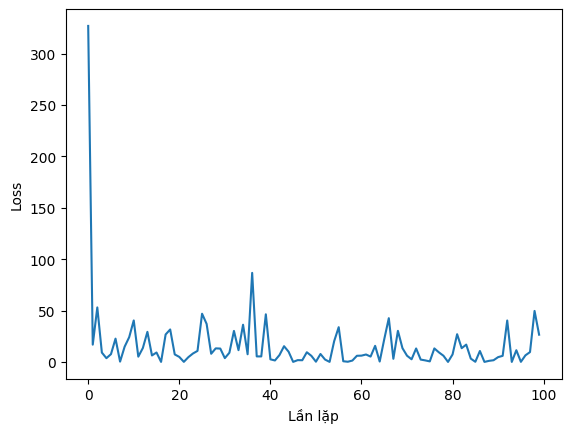

In [17]:
file_name_dataset = '/content/drive/MyDrive/0012. AIO 2024/004. MODULE 4/001. GIAO BÀI TẬP WEEK 1/advertising.csv'
X, y = prepare_data(file_name_dataset)

(w1,w2,w3,b, losses) = implement_linear_regression(X,y)
plt.plot(losses[:100])
plt.xlabel("Lần lặp")
plt.ylabel("Loss")
plt.show()

In [18]:
# xem giá trị trọng số
print(w1, w2, w3)

0.07405984066396477 0.15917360263437663 0.017561197559948935


In [19]:
# given new data
tv = 19.2
radio = 35.9
newspaper = 51.3
X, y = prepare_data(file_name_dataset)
(w1, w2, w3, b, losses) = implement_linear_regression(X, y, epoch_max=50, lr=1e-5)
sales = predict(tv, radio, newspaper, w1, w2, w3, b)
print(f'predicted sales is {sales}')

predicted sales is 8.176413319549823


## Huấn luyện one sample bằng MAE Loss function

In [20]:
def compute_loss_mae(y_hat, y):
    # Tính loss giữa giá trị dự đoán và giá trị thực (Mean Absolute Error)
    loss = abs(y_hat - y)
    return loss

In [21]:
# test
a = compute_loss_mae(y_hat=1,y=0.5)
print(a)

0.5


In [22]:
def implement_linear_regression_mae_loss(X_data, y_data, epoch_max=50, lr=1e-5):
    # Huấn luyện mô hình hồi quy tuyến tính với một mẫu mỗi lần
    losses = []
    w1, w2, w3, b = initialize_params()
    N = len(y_data)

    for epoch in range(epoch_max):
        for i in range(N):
            # Lấy một mẫu dữ liệu
            x1 = X_data[0][i]
            x2 = X_data[1][i]
            x3 = X_data[2][i]
            y = y_data[i]

            # Tính giá trị dự đoán
            y_hat = predict(x1, x2, x3, w1, w2, w3, b)

            # Tính loss
            loss = compute_loss_mae(y_hat, y)

            # Tính gradient
            dl_dw1 = compute_gradient_wi(x1, y, y_hat)
            dl_dw2 = compute_gradient_wi(x2, y, y_hat)
            dl_dw3 = compute_gradient_wi(x3, y, y_hat)
            dl_db = compute_gradient_b(y, y_hat)

            # Cập nhật tham số
            w1 = update_weight_wi(w1, dl_dw1, lr)
            w2 = update_weight_wi(w2, dl_dw2, lr)
            w3 = update_weight_wi(w3, dl_dw3, lr)
            b = update_weight_b(b, dl_db, lr)

            # Ghi lại loss
            losses.append(loss)

    return w1, w2, w3, b, losses

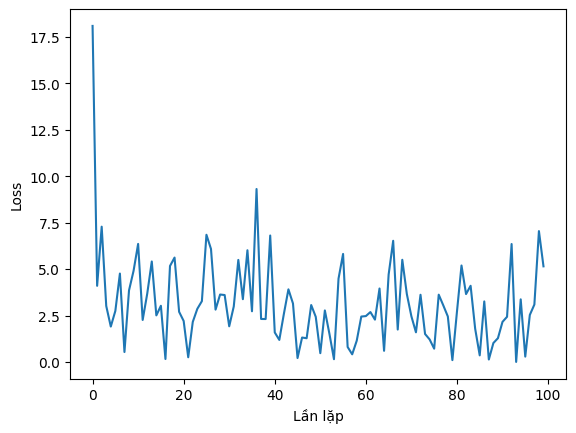

In [23]:
X, y = prepare_data(file_name_dataset)

(w1,w2,w3,b, losses) = implement_linear_regression_mae_loss(X,y)
plt.plot(losses[:100])
plt.xlabel("Lần lặp")
plt.ylabel("Loss")
plt.show()

# Huấn luyện data bằng batch N samples linear regression

## Hàm loss MSE

In [24]:
# Function to compute MSE loss
def compute_loss_mse(y, y_hat):
    return np.power((y_hat - y), 2)

In [25]:
# Function to implement N-sample linear regression
def implement_linear_regression_nsamples(X_data, y_data, epoch_max=50, lr=1e-5):
    losses = []

    # Initialize weights
    w1, w2, w3, b = initialize_params()

    N = len(y_data)

    # Loop over epochs
    for epoch in range(epoch_max):
        loss_total = 0.0
        dw1_total = 0.0
        dw2_total = 0.0
        dw3_total = 0.0
        db_total = 0.0

        # Loop over all samples
        for i in range(N):
            # Get a sample
            x1 = X_data[0][i]
            x2 = X_data[1][i]
            x3 = X_data[2][i]
            y = y_data[i]

            # Compute output
            y_hat = predict(x1, x2, x3, w1, w2, w3, b)

            # Compute loss
            loss = compute_loss_mse(y, y_hat)

            # Accumulate loss
            loss_total += loss

            # Compute gradients for each parameter
            dl_dw1 = compute_gradient_wi(x1, y, y_hat)
            dl_dw2 = compute_gradient_wi(x2, y, y_hat)
            dl_dw3 = compute_gradient_wi(x3, y, y_hat)
            dl_db = compute_gradient_b(y, y_hat)

            # Accumulate gradients
            dw1_total += dl_dw1
            dw2_total += dl_dw2
            dw3_total += dl_dw3
            db_total += dl_db

        # Update parameters after processing all samples
        w1 = update_weight_wi(w1, dw1_total / N, lr)
        w2 = update_weight_wi(w2, dw2_total / N, lr)
        w3 = update_weight_wi(w3, dw3_total / N, lr)
        b = update_weight_b(b, db_total / N, lr)

        # Log average loss for this epoch
        losses.append(loss_total / N)

    return w1, w2, w3, b, losses

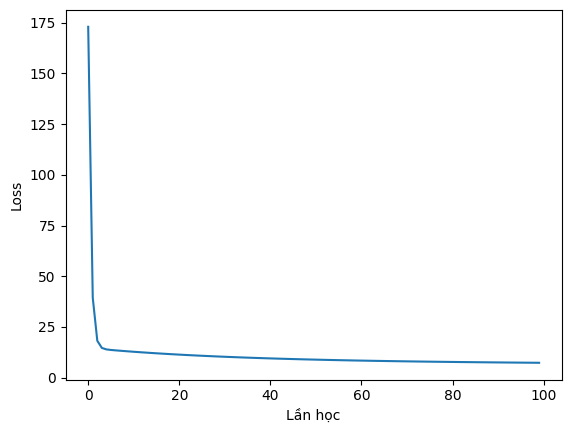

In [26]:
w1, w2, w3, b, losses =  implement_linear_regression_nsamples(X, y, epoch_max=100, lr=1e-5)
plt.plot(losses)
plt.xlabel("Lần học")
plt.ylabel("Loss")
plt.show()

In [27]:
print(w1, w2, w3, b)

0.07291095516263317 0.08138206886574466 0.052029429858699634 0.0026849516679532622


## Hàm loss MAE

In [28]:
def compute_loss_mae(y, y_hat):
    return np.abs(y_hat - y)

In [29]:
# Function to implement N-sample linear regression
def implement_linear_regression_nsamples_mae_loss(X_data, y_data, epoch_max=50, lr=1e-5):
    losses = []

    # Initialize weights
    w1, w2, w3, b = initialize_params()

    N = len(y_data)

    # Loop over epochs
    for epoch in range(epoch_max):
        loss_total = 0.0
        dw1_total = 0.0
        dw2_total = 0.0
        dw3_total = 0.0
        db_total = 0.0

        # Loop over all samples
        for i in range(N):
            # Get a sample
            x1 = X_data[0][i]
            x2 = X_data[1][i]
            x3 = X_data[2][i]
            y = y_data[i]

            # Compute output
            y_hat = predict(x1, x2, x3, w1, w2, w3, b)

            # Compute loss
            loss = compute_loss_mae(y, y_hat)

            # Accumulate loss
            loss_total += loss

            # Compute gradients for each parameter
            dl_dw1 = compute_gradient_wi(x1, y, y_hat)
            dl_dw2 = compute_gradient_wi(x2, y, y_hat)
            dl_dw3 = compute_gradient_wi(x3, y, y_hat)
            dl_db = compute_gradient_b(y, y_hat)

            # Accumulate gradients
            dw1_total += dl_dw1
            dw2_total += dl_dw2
            dw3_total += dl_dw3
            db_total += dl_db

        # Update parameters after processing all samples
        w1 = update_weight_wi(w1, dw1_total / N, lr)
        w2 = update_weight_wi(w2, dw2_total / N, lr)
        w3 = update_weight_wi(w3, dw3_total / N, lr)
        b = update_weight_b(b, db_total / N, lr)

        # Log average loss for this epoch
        losses.append(loss_total / N)

    return w1, w2, w3, b, losses

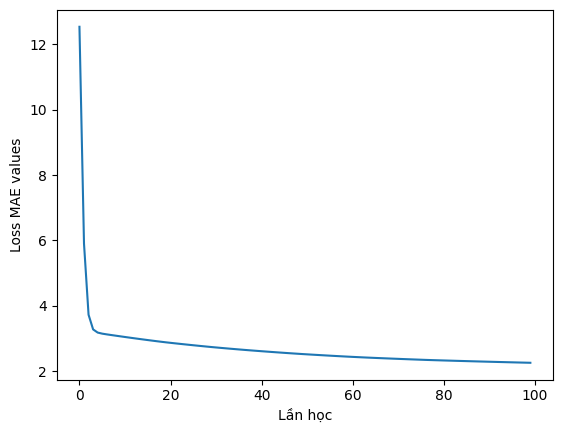

In [30]:
w1, w2, w3, b, losses = implement_linear_regression_nsamples_mae_loss(X, y, epoch_max=100, lr=1e-5)
plt.plot(losses)
plt.xlabel("Lần học")
plt.ylabel("Loss MAE values")
plt.show()

# Huấn luyện data bằng phương pháp Ma Trận - Đại Số Tuyến Tính - Linear regression

## Chuẩn bị data
- y_pred = a0 * x0 + a1 * x1 + a2 * x2 + .... + an * xn
- x0: 1


In [31]:
def prepare_data_matrix(file_name_dataset):
  """
  Input đầu vào: file csv
  Output đầu ra: tuple(X_matrix, y_matrix)
  """
  data = np.genfromtxt(file_name_dataset, delimiter=',', skip_header=1).tolist()

  # lấy dữ liệu từ cột
  tv_data = get_column(data, 0)
  radio_data = get_column(data, 1)
  newspaper_data = get_column(data, 2)
  sales_data = get_column(data, 3)

  # Tạo danh sách features cho input
  X = [[1,x2, x3, x4] for x2, x3, x4 in zip(tv_data, radio_data, newspaper_data)]
  y = sales_data

  return X, y

## Tạo trọng số ban đầu

In [32]:
def initialize_params():
    """
    Khởi tạo ngẫu nhiên giá trị ban đầu cho bias và trọng số.

    Returns:
        list: Danh sách chứa bias và các trọng số w1, w2, w3.
    """
    bias = 0
    w1 = random.gauss(mu = 0.0, sigma = 0.01)
    w2 = random.gauss(mu = 0.0, sigma = 0.01)
    w3 = random.gauss(mu = 0.0, sigma = 0.01)

    return [0 , -0.01268850433497871 , 0.004752496982185252 , 0.0073796171538643845]

## Dự đoán output từng sample

In [33]:
def predict(X_features, weights):
    """
    Dự đoán output bằng cách sử dụng hàm y = x0*b + x1*w1 + x2*w2 + x3*w3.
    Args:
        X_features (list): Danh sách các feature của một mẫu.
        weights (list): Danh sách các trọng số.

    Returns:
        float: Giá trị dự đoán của output.
    """
    y_hat = sum([x * w for x, w in zip(X_features, weights)])
    return y_hat

## Tính toán mất mác

In [34]:
def compute_loss(y_hat, y):
    """
    Tính toán loss giữa giá trị dự đoán và giá trị thực tế.
    Args:
        y_hat (float): Giá trị dự đoán.
        y (float): Giá trị thực tế.

    Returns:
        float: Giá trị của loss.
    """
    return (y_hat - y) ** 2

## Tính đạo hàm ứng với từng features

In [35]:
def compute_gradient_w(X_features, y, y_hat):
    """
    Tính đạo hàm của hàm loss theo các trọng số.
    Args:
        X_features (list): Danh sách các feature của một mẫu.
        y (float): Giá trị thực tế của output.
        y_hat (float): Giá trị dự đoán của output.

    Returns:
        list: Gradient của loss theo từng trọng số.
    """
    dl_dweights = [2 * (y_hat - y) * x for x in X_features]
    return dl_dweights

## Cập nhật trọng số sau khi tính gradient

In [36]:
def update_weight(weights, dl_dweights, lr):
    """
    Cập nhật trọng số sau khi tính gradient.
    Args:
        weights (list): Danh sách các trọng số.
        dl_dweights (list): Gradient của loss theo từng trọng số.
        lr (float): Learning rate.

    Returns:
        list: Danh sách trọng số sau khi cập nhật.
    """
    weights = [w - lr * dw for w, dw in zip(weights, dl_dweights)]
    return weights

## Hàm train linear regression

In [55]:
def implement_linear_regression(X_feature, y_output, epoch_max=50, lr=1e-5):
    """
    Huấn luyện mô hình Linear Regression.
    Args:
        X_feature (list): Dữ liệu đầu vào.
        y_output (list): Dữ liệu đầu ra.
        epoch_max (int): Số epoch tối đa.
        lr (float): Learning rate.

    Returns:
        tuple: Trọng số cuối cùng và danh sách loss trong quá trình huấn luyện.
    """
    losses = []
    weights = initialize_params()
    N = len(y_output)
    for epoch in range(epoch_max):
        print('epoch: ' , epoch)
        for i in range(N):
            # Lấy một mẫu - hàng thứ i
            features_i = X_feature[i]
            y = y_output[i]

            # Tính output dự đoán
            y_hat = predict(features_i, weights)

            # Tính loss
            loss = compute_loss_mse(y_hat, y)

            # Tính gradient của các trọng số
            dl_dweights = compute_gradient_w(features_i, y, y_hat)

            # Cập nhật trọng số
            weights = update_weight(weights, dl_dweights, lr)

            # Logging
            losses.append(loss)
    return weights, losses

## Train

epoch:  0
epoch:  1
epoch:  2
epoch:  3
epoch:  4
epoch:  5
epoch:  6
epoch:  7
epoch:  8
epoch:  9
epoch:  10
epoch:  11
epoch:  12
epoch:  13
epoch:  14
epoch:  15
epoch:  16
epoch:  17
epoch:  18
epoch:  19
epoch:  20
epoch:  21
epoch:  22
epoch:  23
epoch:  24
epoch:  25
epoch:  26
epoch:  27
epoch:  28
epoch:  29
epoch:  30
epoch:  31
epoch:  32
epoch:  33
epoch:  34
epoch:  35
epoch:  36
epoch:  37
epoch:  38
epoch:  39
epoch:  40
epoch:  41
epoch:  42
epoch:  43
epoch:  44
epoch:  45
epoch:  46
epoch:  47
epoch:  48
epoch:  49
Trọng số cuối cùng: [0.13922134568608693, 0.07405993048589583, 0.1591738341288154, 0.01756130169377892]


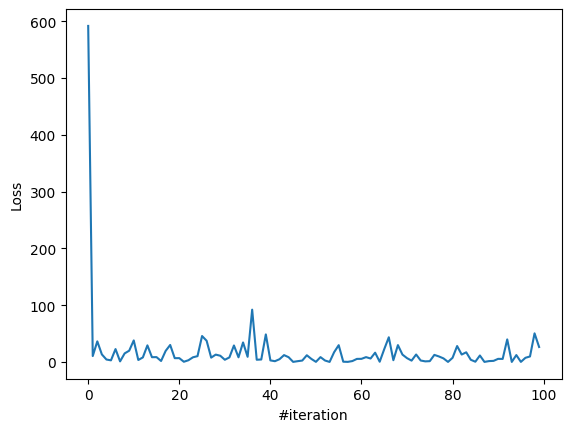

In [58]:
file_name = '/content/drive/MyDrive/0012. AIO 2024/004. MODULE 4/001. GIAO BÀI TẬP WEEK 1/advertising.csv'
X, y = prepare_data_matrix(file_name)
weights, losses = implement_linear_regression(X, y)
print("Trọng số cuối cùng:", weights)
plt.plot(losses[:100])
plt.xlabel("#iteration")
plt.ylabel("Loss")
plt.show()

# Feature Scaling
- Chuẩn hóa dữ liệu đầu vào giúp hàm loss nhanh hội tụ
- Chuẩn hóa theo MinMax Scale
- X_new = Xold - Xmin / (X_max - X_min)

## Hàm chuẩn hóa theo phương MinMax Scale

In [61]:
def min_max_scaling(data1, data2, data3):
  max_tv = max(data1)
  max_radio = max(data2)
  max_newspaper = max(data3)

  min_tv = min(data1)
  min_radio = min(data2)
  min_newspaper = min(data3)

  # áp dụng MinMax Scaling
  data1 = [(x - min_tv) / (max_tv - min_tv) for x in data1]
  data2 = [(x - min_radio) / (max_radio - min_radio) for x in data2]
  data3 = [(x - min_newspaper) / (max_newspaper - min_newspaper) for x in data3]

  return (data1, data2, data3), (max_tv, max_radio, max_newspaper, min_tv, min_radio, min_newspaper)

## Hàm chuẩn bị data

In [62]:
def prepare_data_scaling(file_name_dataset):
  data = np.genfromtxt(file_name_dataset, delimiter= ',', skip_header=1).tolist()

  # lấy dữ liệu từ cột
  tv_data = get_column(data, 0)
  radio_data = get_column(data, 1)
  newspaper_data = get_column(data, 2)
  sales_data = get_column(data,3)

  (tv_data, radio_data, newspaper_data), (max_tv, max_radio, max_newspaper, min_tv, min_radio, min_newspaper) = min_max_scaling(tv_data, radio_data, newspaper_data)

  # Tạo ma trận features
  X = [[1,x2, x3, x4] for x2, x3, x4 in zip(tv_data, radio_data, newspaper_data)]
  y = sales_data

  return X, y

epoch:  0
epoch:  1
epoch:  2
epoch:  3
epoch:  4
epoch:  5
epoch:  6
epoch:  7
epoch:  8
epoch:  9
epoch:  10
epoch:  11
epoch:  12
epoch:  13
epoch:  14
epoch:  15
epoch:  16
epoch:  17
epoch:  18
epoch:  19
epoch:  20
epoch:  21
epoch:  22
epoch:  23
epoch:  24
epoch:  25
epoch:  26
epoch:  27
epoch:  28
epoch:  29
epoch:  30
epoch:  31
epoch:  32
epoch:  33
epoch:  34
epoch:  35
epoch:  36
epoch:  37
epoch:  38
epoch:  39
epoch:  40
epoch:  41
epoch:  42
epoch:  43
epoch:  44
epoch:  45
epoch:  46
epoch:  47
epoch:  48
epoch:  49
Trọng số cuối cùng: [2.589119227272405, 1.529547108193942, 1.3146371289761336, 0.7221518713155053]


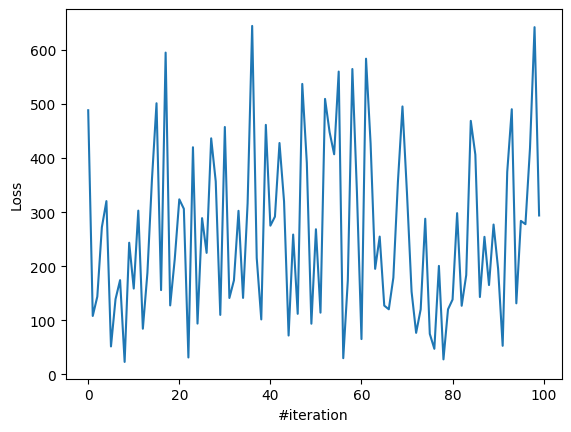

In [66]:
file_name = '/content/drive/MyDrive/0012. AIO 2024/004. MODULE 4/001. GIAO BÀI TẬP WEEK 1/advertising.csv'
X, y = prepare_data_scaling(file_name)
weights, losses = implement_linear_regression(X, y)
print("Trọng số cuối cùng:", weights)
plt.plot(losses[:100])
plt.xlabel("#iteration")
plt.ylabel("Loss")
plt.show()